# Clustering
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups. It is a unsupervised-machine learning technique to group data points characterized by specific features.

## Clustering Music Genres
Clustering music genres is a task of grouping music based on the similarities in their audio characteristics.
Every person has a different taste in music. We cannot identify what kind of music does a person likes by just knowing about their lifestyle, hobbies, or profession. But if we know what kind of songs a person listens to daily, we can find similarities in all the music files and recommend similar music to the person.

Here our aim is to group music genres based on similarities in their audio characteristics from the dataset of popular songs on Spotify, which contains artists and music names with all audio characteristics of each music

In [61]:
import pandas as pd
import numpy as np
from sklearn import cluster
from matplotlib  import pyplot as plt

data = pd.read_csv("Spotify-2000.csv")
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [41]:
data = data.drop(columns=["Index"])
print(data.corr(numeric_only=True))


                            Year  Beats Per Minute (BPM)    Energy  \
Year                    1.000000                0.012570  0.147235   
Beats Per Minute (BPM)  0.012570                1.000000  0.156644   
Energy                  0.147235                0.156644  1.000000   
Danceability            0.077493               -0.140602  0.139616   
Loudness (dB)           0.343764                0.092927  0.735711   
Liveness                0.019017                0.016256  0.174118   
Valence                -0.166163                0.059653  0.405175   
Acousticness           -0.132946               -0.122472 -0.665156   
Speechiness             0.054097                0.085598  0.205865   
Popularity             -0.158962               -0.003181  0.103393   

                        Danceability  Loudness (dB)  Liveness   Valence  \
Year                        0.077493       0.343764  0.019017 -0.166163   
Beats Per Minute (BPM)     -0.140602       0.092927  0.016256  0.059653   
Ener

Here, the corr() function is used to see the correlation between the audio feartures in the dataset. 

By setting numeric_only=True, you're explicitly indicating that you want to calculate the correlation only for numeric columns 

## Clustering Analysis of Audio Features

Now I will use the K-means clustering algorithm to find the similarities between all the audio features. Then I will add clusters in the dataset based on the similarities we found. So let’s find the aprropriate number of clusters among the audio characteristics and perform clustering analysis using the K-means clustering algorithm:

### Finding appropriate number of cluster from elbow method

In [65]:
from sklearn.cluster import KMeans

k_rng = range(5,15)
se = []

for i in k_rng:
    kmean = KMeans(n_clusters= i, n_init= 10)
    kmean.fit_predict(data2)
    se.append(kmean.inertia_)


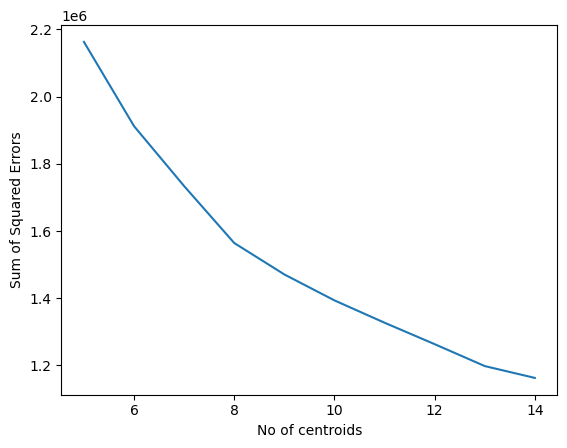

In [66]:
plt.xlabel('No of centroids')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng,se)

Here, we will choose 10 as the number of clusters. Now we are using MinMaxScaler for the data preprocessing that will scale all the numeric features which will make the clustering more efficient

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['number']).columns
for i in numeric_columns:
    data[i] = scaler.fit_transform(data[[i]])
    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,n_init = 10)
clusters = kmeans.fit_predict(data[numeric_columns])

In [83]:
print(np.max(clusters))

9


In [74]:
data["Music Segments"] = clusters
data["Music Segments"] = data["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10"})

The dataset with clustered in printed below.

In [71]:
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

## Visualizing the clusters
Now let’s visualize the clusters based on some of the audio features:

In [84]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music Segments"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))




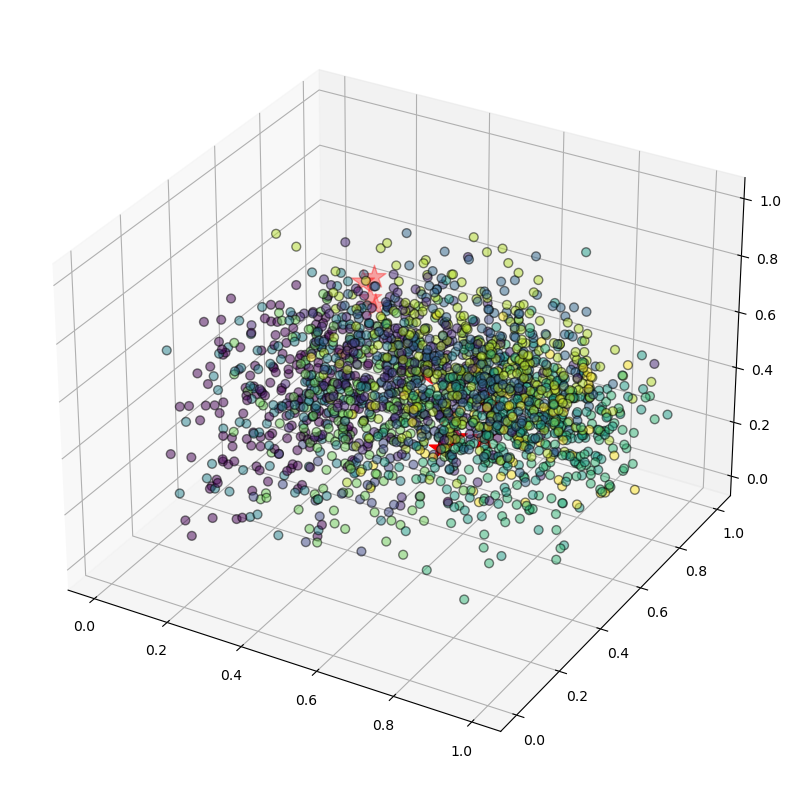

In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot( projection='3d')

# Data for a three-dimensional line
z = data.Danceability
x = data.Energy
y = data['Beats Per Minute (BPM)']
ax.scatter3D(x, y, z,  c=clusters, cmap='viridis',
            edgecolor='k', s=40, alpha = 0.5)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
           kmeans.cluster_centers_[:,2], 
           s = 300, c = 'r', marker='*', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=False)    
